**IMPORTING THE LIBRARIES**



In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot  as plt
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from  sklearn import metrics
from sklearn.metrics import accuracy_score

**DOWNLOADING THE NLP PACKAGES**


In [ ]:

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**FUNCTIONS**

**REMOVING THE PUNCTUATION**

In [ ]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"',",","-","\n","#",'@',"www","//","http"))
    return final


**DATA PREPROCESSING**

In [ ]:
class preprocess:
  def Tokenize(self,datacolumn):
    list =[]
    for i in datacolumn:
      i = word_tokenize(i)
      list.append(i)

    return list
     
  def remove_stopwords(self,datacolumn):
    Stopwords = set(STOPWORDS)
    list=[]
    for i in datacolumn:
      i = [x for x in i if x not in Stopwords]
      list.append(i)
    #print(i)
    return list
  
  def lemmatization(self,datacolumn):
    lemmatizer = WordNetLemmatizer()
    list=[]
    for i in datacolumn:
      list2=[]
      for tokens in i:
        tokens=lemmatizer.lemmatize(tokens)
        list2.append(tokens)
      list.append(list2)
    return list

**CHANGING LIST TO SENTENCE**

In [ ]:
def to_string(datacolumn):
  for i in range(len(datacolumn)):
    datacolumn[i] = ' '.join([str(elem) for elem in datacolumn[i]])
  return datacolumn

**IMPORTING DATA**

In [ ]:
data = pd.read_csv("/content/sample_data/tweets.csv",encoding ='utf-8')
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
1,2,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
2,3,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,Positive
3,4,44963,"Boksburg, South Africa",04-03-2020,Best quality couches at unbelievably low price...,Positive
4,5,44967,"Washington, DC",04-03-2020,While we were busy watching election returns a...,Positive


In [ ]:
data=data.drop(['UserName','ScreenName','Location','TweetAt'],axis=1)

In [ ]:
data

,OriginalTweet,Sentiment
0,When I couldn't find hand sanitizer at Fred Me...,Positive
1,#Panic buying hits #NewYork City as anxious sh...,Negative
2,Voting in the age of #coronavirus = hand sanit...,Positive
3,Best quality couches at unbelievably low price...,Positive
4,While we were busy watching election returns a...,Positive
...,...,...
1983,Just been through K?piti New World which is bu...,Positive
1984,"Even though the Law Library is closed, ALL sub...",Positive
1985,"@RicePolitics @MDCounties Craig, will you call...",Negative
1986,Meanwhile In A Supermarket in Israel -- People...,Positive


**UPPERCASE TO LOWER CASE**

In [ ]:
data['OriginalTweet'] = [entry.lower() for entry in data['OriginalTweet']]

**REMOVING THE PUNCTUATION**

In [ ]:
data['OriginalTweet'] = data['OriginalTweet'].apply(remove_punctuation)
data.head(3)

,OriginalTweet,Sentiment
0,when i couldn't find hand sanitizer at fred me...,Positive
1,panic buying hits newyork city as anxious shop...,Negative
2,voting in the age of coronavirus = hand saniti...,Positive


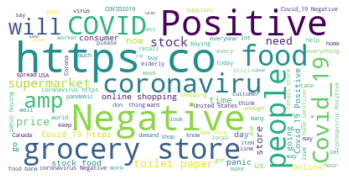

In [ ]:
data1  = open('/content/sample_data/tweets.csv','r').read()
text=data1
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**TOKENIREZATION, LEMMATIZATION, REMOVING STOPWORDS**





In [ ]:
token = preprocess()
list1=token.Tokenize(data['OriginalTweet'])
#list1=np.array(list1)
list1=token.remove_stopwords(list1)
list1 = token.lemmatization(list1)
df = pd.DataFrame(data=[list1],index=['OriginalTweet'])
df=df.T
df.head()

,OriginalTweet
0,"[n't, find, hand, sanitizer, fred, meyer, turn..."
1,"[panic, buying, hit, newyork, city, anxious, s..."
2,"[voting, age, coronavirus, =, hand, sanitizer,..."
3,"[best, quality, couch, unbelievably, low, pric..."
4,"[busy, watching, election, return, bracing, co..."


In [ ]:
df1 = df.copy()

**DATA VISUALIZATION**

In [ ]:
positive = data[data['Sentiment'] == 1]
negative = data[data['Sentiment'] == 0]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


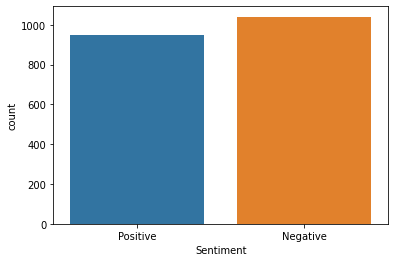

In [ ]:
sns.countplot(data["Sentiment"])

In [ ]:
data.head()

,OriginalTweet,Sentiment
0,when i couldn't find hand sanitizer at fred me...,Positive
1,panic buying hits newyork city as anxious shop...,Negative
2,voting in the age of coronavirus = hand saniti...,Positive
3,best quality couches at unbelievably low price...,Positive
4,while we were busy watching election returns a...,Positive


In [ ]:
df1.head()

,OriginalTweet
0,"[n't, find, hand, sanitizer, fred, meyer, turn..."
1,"[panic, buying, hit, newyork, city, anxious, s..."
2,"[voting, age, coronavirus, =, hand, sanitizer,..."
3,"[best, quality, couch, unbelievably, low, pric..."
4,"[busy, watching, election, return, bracing, co..."


**changing the list to sentence**

In [ ]:
df1['OriginalTweet'] = to_string(df1['OriginalTweet'])

In [ ]:
df1.head()

,OriginalTweet
0,n't find hand sanitizer fred meyer turned amaz...
1,panic buying hit newyork city anxious shopper ...
2,voting age coronavirus = hand sanitizer supert...
3,best quality couch unbelievably low price avai...
4,busy watching election return bracing covid19 ...


**MODEL BUILDING**

**TRAIN TEST SPLIT**

In [ ]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df1["OriginalTweet"],data['Sentiment'],test_size=0.3,random_state=40)


**VECTORIZATION**

In [ ]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(df1['OriginalTweet'])

Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [ ]:
print(Train_X_Tfidf)

  (0, 4383)	0.2841747765587029
  (0, 3886)	0.07986175481421982
  (0, 3771)	0.30111029386256954
  (0, 3645)	0.25885762057022815
  (0, 3594)	0.17812659863286756
  (0, 3546)	0.25885762057022815
  (0, 3495)	0.30111029386256954
  (0, 3445)	0.26723925925483627
  (0, 3253)	0.3300617519184075
  (0, 3019)	0.15870203116621084
  (0, 2023)	0.12772914034384616
  (0, 1913)	0.24320737775089363
  (0, 1358)	0.07996643688646819
  (0, 1335)	0.15767908718201679
  (0, 1047)	0.21297064521052356
  (0, 905)	0.25522331850286495
  (0, 678)	0.10140761046737358
  (0, 643)	0.08317885905532736
  (0, 604)	0.16666388616696315
  (0, 53)	0.31312623461454087
  (1, 4775)	0.3041322627374547
  (1, 4391)	0.2398170479454047
  (1, 4003)	0.2298184143426605
  (1, 3989)	0.16057007383564204
  (1, 3662)	0.08614070138928419
  :	:
  (1390, 4793)	0.24463664628673037
  (1390, 4709)	0.11227998396666025
  (1390, 4690)	0.20390498644900942
  (1390, 4488)	0.14381177372566767
  (1390, 4177)	0.1927532519184371
  (1390, 3989)	0.14754507419468

**NAIVE BAYES MODEL:**

In [ ]:
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
predictions_NB = Naive.predict(Test_X_Tfidf)

In [ ]:
print("Naive Bayes :  Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)

Naive Bayes :  Accuracy Score ->  60.63651591289783


**CLASSFICATION METRICS FOR NAIVE BAYES**

In [ ]:
print(metrics.classification_report(predictions_NB, Test_Y))

              precision    recall  f1-score   support

    Negative       0.70      0.63      0.66       364
    Positive       0.50      0.57      0.53       233

    accuracy                           0.61       597
   macro avg       0.60      0.60      0.60       597
weighted avg       0.62      0.61      0.61       597



In [ ]:
print(metrics.confusion_matrix(predictions_NB, Test_Y))

[[229 135]
 [100 133]]


In [ ]:
import pandas as pd
import collections
%matplotlib inline

# Import modules to calculate accuracy and confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
data = pd.read_csv('/content/sample_data/tweets.csv')
train = data.loc[:1200]
test = data.loc[1200:]
data.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
1,2,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
2,3,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,Positive
3,4,44963,"Boksburg, South Africa",04-03-2020,Best quality couches at unbelievably low price...,Positive
4,5,44967,"Washington, DC",04-03-2020,While we were busy watching election returns a...,Positive


In [ ]:
appos = {
"aren't" : "are not",
"can't" : "cannot",
"cant" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"im" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not",
"gg" : "going"
}

In [ ]:
import re

def preprocess_text(sentence):
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','', sentence['OriginalTweet'])
    text = re.sub('@[^\s]+','', text)
    text = text.lower().split()
    reformed = [appos[word] if word in appos else word for word in text]
    reformed = " ".join(reformed) 
    text = re.sub('&[^\s]+;', '', reformed)
    text = re.sub('[^a-zA-Zа-яА-Я1-9]+', ' ', text)
    text = re.sub(' +',' ', text)
    #text = re.sub(' [\w] ', ' ', text)
    return text.strip()

preprocess = train
preprocess['ugc'] = preprocess.apply(preprocess_text, axis=1)

preprocess.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,ugc
0,1,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,when i could not find hand sanitizer at fred m...
1,2,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,panic buying hits newyork city as anxious shop...
2,3,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,Positive,voting in the age of coronavirus hand sanitize...
3,4,44963,"Boksburg, South Africa",04-03-2020,Best quality couches at unbelievably low price...,Positive,best quality couches at unbelievably low price...
4,5,44967,"Washington, DC",04-03-2020,While we were busy watching election returns a...,Positive,while we were busy watching election returns a...


# **VaderSentiment**

In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 4.4 MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
def print_sentiment_scores(ugc):
    snt = analyzer.polarity_scores(ugc['ugc'])  # Calling the polarity analyzer
    return snt['compound']

In [ ]:
compound = train
compound['score']=compound.apply(print_sentiment_scores, axis=1)


compound.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,ugc,score
0,1,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,when i could not find hand sanitizer at fred m...,-0.1190
1,2,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,panic buying hits newyork city as anxious shop...,-0.6486
2,3,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,Positive,voting in the age of coronavirus hand sanitize...,0.4939
3,4,44963,"Boksburg, South Africa",04-03-2020,Best quality couches at unbelievably low price...,Positive,best quality couches at unbelievably low price...,0.0534
4,5,44967,"Washington, DC",04-03-2020,While we were busy watching election returns a...,Positive,while we were busy watching election returns a...,0.4215


In [ ]:
predicted = ["Positive" if compound['score'][i] > 0 else "Negative" for i in range(len(compound['score'])) ]
compound['Predicted'] = predicted
compound.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,ugc,score,Predicted
0,1,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,when i could not find hand sanitizer at fred m...,-0.1190,Negative
1,2,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,panic buying hits newyork city as anxious shop...,-0.6486,Negative
2,3,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,Positive,voting in the age of coronavirus hand sanitize...,0.4939,Positive
3,4,44963,"Boksburg, South Africa",04-03-2020,Best quality couches at unbelievably low price...,Positive,best quality couches at unbelievably low price...,0.0534,Positive
4,5,44967,"Washington, DC",04-03-2020,While we were busy watching election returns a...,Positive,while we were busy watching election returns a...,0.4215,Positive


In [ ]:
positive = 0
negative = 0
neutral = 0

for i in compound['score']:
    if i == 0:
        neutral += 1
    elif i > 0:
        positive += 1
    else:
        negative += 1

visualDf = pd.DataFrame({"Positive": [positive], "Negative":[negative], "Neutral": neutral})
visualDf

,Positive,Negative,Neutral
0,546,651,4


# **Analysis**

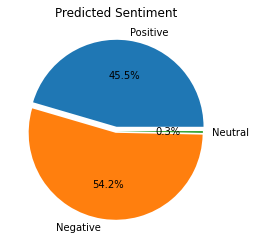

In [ ]:
import matplotlib.pyplot as plt
my_labels = 'Positive','Negative','Neutral'
plt.pie(visualDf.loc[0] ,labels =my_labels, autopct='%1.1f%%', explode = [0.05, 0.02, 0])
plt.title('Predicted Sentiment')
plt.show()

In [ ]:
a_positive = 0
a_negative = 0
a_neutral = 0

for i in compound['Sentiment']:
    if i == "Positive":
        a_positive += 1
    elif i == "Negative":
        a_negative += 1
    else:
        a_negative += 1

actualDf = pd.DataFrame({"Positive": [a_positive], "Negative":[a_negative], "Neutral": [a_neutral]})
actualDf

,Positive,Negative,Neutral
0,555,646,0


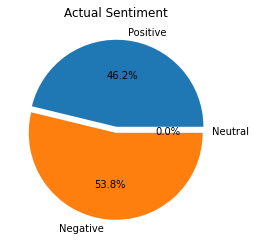

In [ ]:
my_labels = 'Positive','Negative','Neutral'
plt.pie(actualDf.loc[0] ,labels =my_labels, autopct='%1.1f%%', explode = [0.05, 0.02, 0])
plt.title('Actual Sentiment')
plt.show()